In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
df.drop(df.columns[0], axis=1,inplace=True)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [5]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [6]:
#checking unique values
for col in df.columns:
    vals = df[col].nunique()
    print(f"Column {col} unique values\t{vals}")

Column location unique values	139
Column country unique values	34
Column gender unique values	3
Column age unique values	81
Column vis_wuhan unique values	2
Column from_wuhan unique values	2
Column symptom1 unique values	25
Column symptom2 unique values	32
Column symptom3 unique values	20
Column symptom4 unique values	13
Column symptom5 unique values	4
Column symptom6 unique values	2
Column diff_sym_hos unique values	18
Column result unique values	2


## Data Prepration

> all features are categorical except for the age and diff_sym_hos feature

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
# replacing categorical columns
continous_col = ['age','diff_sym_hos']
col_names = [col for col in X.columns if col not in continous_col]
X = pd.get_dummies(X, columns=col_names)

In [9]:
X.head()

,age,diff_sym_hos,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,...,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,symptom6_0,symptom6_1
0,66.0,8,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
1,56.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
2,46.0,13,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,60.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,58.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [10]:
from sklearn.model_selection import train_test_split
random_state = 42
clsf_list = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

> Note that both cross_val_score and Grid search divide training set into training and validation sets implicitly

In [11]:
def print_scores(y_test,y_pred):
    print(f"f1 score\t{f1_score(y_test,y_pred)}\n\
precision\t{precision_score(y_test,y_pred)}\n\
recall\t{recall_score(y_test,y_pred)}\n\
accuracy\t{accuracy_score(y_test,y_pred)}\n")

## Training KNN

### Graphical Approach 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

k_values = [i for i in range (1,31)]
scores = []
# scores to consider
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}
for scorer in scorers:
    scores.append([])
    for k in k_values:
        # train knn with new k value
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X_train, y_train, scoring=scorers[scorer])
        # add mean value of score for all folds
        scores[-1].append(np.mean(score))

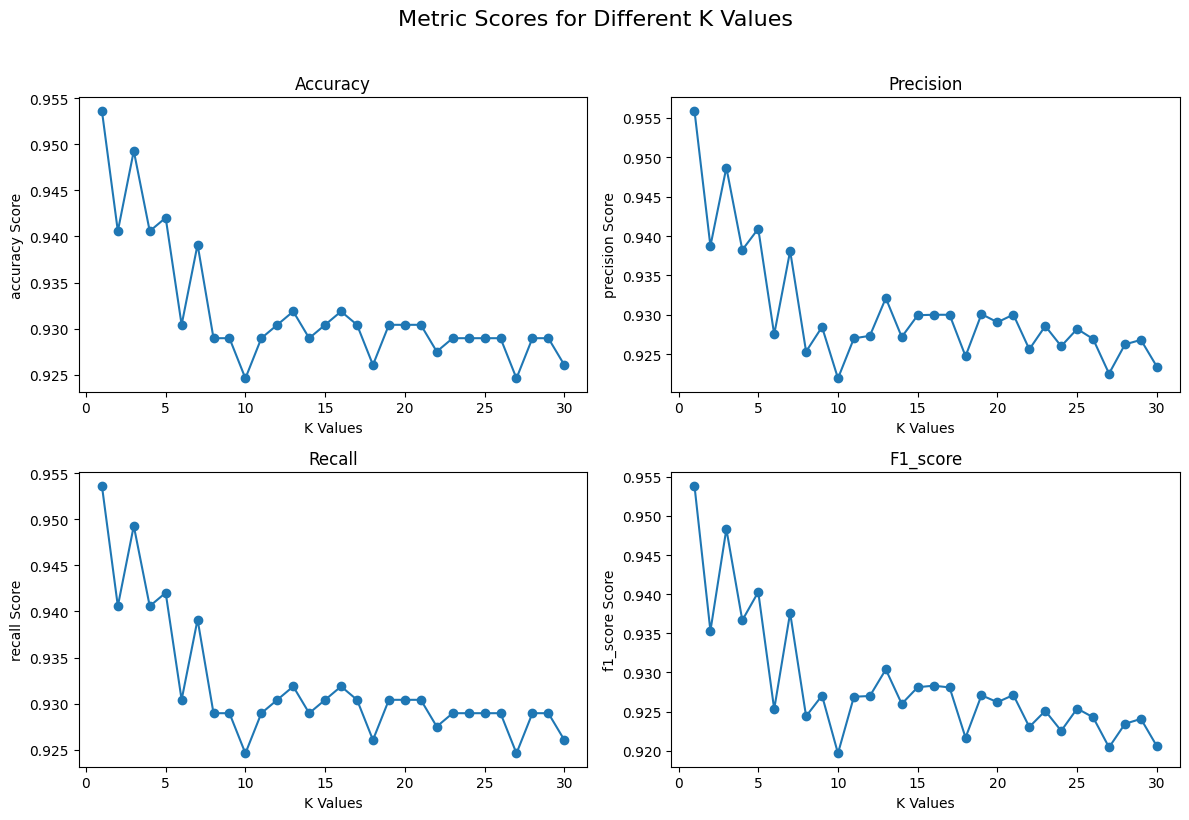

In [13]:
plt.figure(figsize=(12, 8))
for i,score in enumerate(scorers):
    plt.subplot(2, 2, i + 1)
    plt.plot(k_values,scores[i], marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel(f"{score} Score")
    plt.title(score.capitalize())
    
plt.suptitle('Metric Scores for Different K Values', y=1.02, fontsize=16)
plt.tight_layout()

> it is evident from above figures k  = __1__ is the optimal value of k

### Programtic approach

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':k_values}  
grid_search = GridSearchCV(knn, param_grid, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_f1_score = grid_search.best_score_
print(f"Best k value: {best_k}\nBest F1-score: {best_f1_score}")

Best k value: 1
Best F1-score: 0.9538601806563116


In [15]:
# fitting data 
knn_clsf =KNeighborsClassifier(n_neighbors=best_k)
clsf_list.append(knn_clsf)
knn_clsf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# testing data for k = 1
knn_clsf_pred = knn_clsf.predict(X_test)
print_scores(y_test,knn_clsf_pred)

f1 score	0.8510638297872342
precision	0.9090909090909091
recall	0.8
accuracy	0.9595375722543352



## Training Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
# newton-cholesky solver is used since it excels with one-hot categorical data that have rare categories

param_grid = {'solver': ['newton-cholesky'],'C': [100, 10, 1.0, 0.1, 0.01]}
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_solver = grid_search.best_params_['C']
best_f1_score = grid_search.best_score_

print(f"Best solver: {best_solver}")
print(f"Best F1-score: {best_f1_score}")

Best solver: 100
Best F1-score: 0.973640341618518


In [18]:
# fitting data 
log_reg_clsf =LogisticRegression(solver="newton-cholesky",C=best_solver)
clsf_list.append(log_reg_clsf)
log_reg_clsf.fit(X_train, y_train)

LogisticRegression(C=100, solver='newton-cholesky')

In [19]:
log_reg_clsf_pred = log_reg_clsf.predict(X_test)
print_scores(y_test,log_reg_clsf_pred)

f1 score	0.7999999999999999
precision	0.9
recall	0.72
accuracy	0.9479768786127167



## Training Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(naive_bayes,param_grid,scoring='f1_weighted')

grid_search = GridSearchCV(naive_bayes, param_grid, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_smoothing = grid_search.best_params_['var_smoothing']
best_f1_score = grid_search.best_score_

print(f"Best solver: {best_solver}")
print(f"Best F1-score: {best_f1_score}")

Best solver: 100
Best F1-score: 0.9283272530907407


In [21]:
# fitting data 
niave_bayes_clsf =GaussianNB(var_smoothing=best_smoothing)
clsf_list.append(niave_bayes_clsf)
niave_bayes_clsf.fit(X_train, y_train)

GaussianNB(var_smoothing=0.02310129700083159)

In [22]:
naive_bayes_clsf_pred = niave_bayes_clsf.predict(X_test)
print_scores(y_test,naive_bayes_clsf_pred)

f1 score	0.65
precision	0.8666666666666667
recall	0.52
accuracy	0.9190751445086706



## Comparing All Models

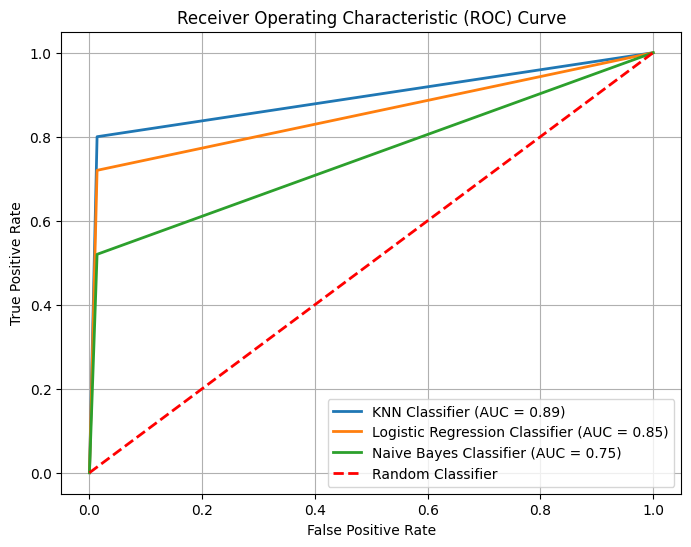



From the above ROC Curve it is evident that the KNN classifier is the best one




In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
clsf_names = ['KNN','Logistic Regression','Naive Bayes']
clsfs_preds = [knn_clsf_pred,log_reg_clsf_pred,naive_bayes_clsf_pred]
best_clsf_idx = 0
best_roc_auc = -1
for idx, y_pred in enumerate(clsfs_preds):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    if(best_roc_auc < roc_auc):
        best_clsf_idx = idx 
        best_roc_auc = roc_auc
    plt.plot(fpr, tpr, lw=2, label=f'{clsf_names[idx]} Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f"\n\nFrom the above ROC Curve it is evident that the {clsf_names[best_clsf_idx]} classifier is the best one\n\n")

In [24]:
best_clsf = clsf_list[best_clsf_idx]
y_pred = best_clsf.predict(X_test)
print_scores(y_test,y_pred)

f1 score	0.8510638297872342
precision	0.9090909090909091
recall	0.8
accuracy	0.9595375722543352

